<a href="https://colab.research.google.com/github/sophiabj/03-presidential-election/blob/master/Road_Safety_Time_Series_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: Can we predict the dangerous and safest times to travel in United Kingdom (UK)?

Data: The data contains information on road accidents that occurred in UK in 2016. It includes details of casualties and vehicles involved in the accidents.



In [1]:
#pip install fbprophet


In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
sns.set(style ='whitegrid', rc={'grid.linewidth':0.8})
#import some metrics and stats
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
#import model
from fbprophet import Prophet

In [3]:
#EDA on Road Accidents
main = pd.read_csv("https://raw.githubusercontent.com/sophiabj/stage-f-01-road-safety/master/data/dftRoadSafety_Accidents_2016.csv")
pd.set_option("display.max_columns", 32)
main.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.



,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


([<matplotlib.axis.XTick at 0x7f5063ae6860>,
 [Text(0, 0, 'Sunday'),
  Text(0, 0, 'Monday'),
  Text(0, 0, 'Tuesday'),
  Text(0, 0, 'Wednesday'),
  Text(0, 0, 'Thursday'),
  Text(0, 0, 'Friday'),
  Text(0, 0, 'Saturday')])

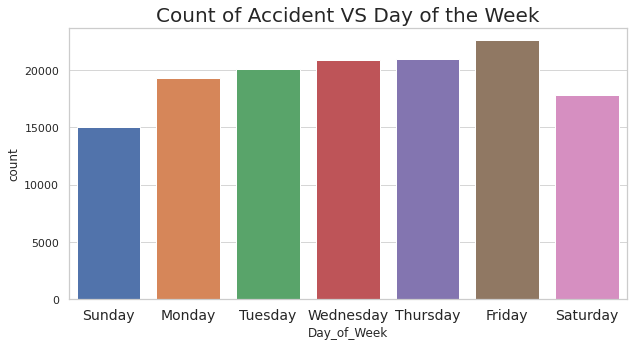

In [4]:
#Accident Counts on Day of the Week
plt.figure(figsize=(10,5))
sns.countplot(x = 'Day_of_Week', data = main, saturation=0.9)
plt.title('Count of Accident VS Day of the Week', fontsize = 20)
index = [0,1,2,3,4,5,6,]
plt.xticks(index,['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], fontsize = 14)

([<matplotlib.axis.XTick at 0x7f5063b57748>,
 [Text(0, 0, 'Fine no high winds'),
  Text(0, 0, 'Raining no high winds'),
  Text(0, 0, 'Unknown'),
  Text(0, 0, 'Other'),
  Text(0, 0, 'Snowing no high winds'),
  Text(0, 0, 'Raining + high winds'),
  Text(0, 0, 'Fine + high winds'),
  Text(0, 0, 'Snowing + high winds'),
  Text(0, 0, 'Fog or mist')])

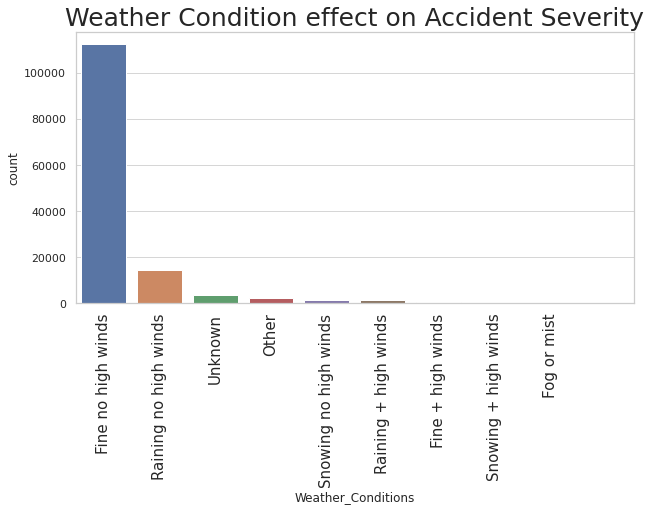

In [5]:
#Accident severity due to Weather Conditions
plt.figure(figsize=(10,5))
sns.countplot(x ='Weather_Conditions', data=main,order = main['Weather_Conditions'].value_counts().index)
plt.title('Weather Condition effect on Accident Severity', fontsize=25)
index = [0,1,2,3,4,5,6,7,8]
plt.xticks(index,['Fine no high winds', 'Raining no high winds','Unknown','Other','Snowing no high winds',
                  'Raining + high winds','Fine + high winds', 'Snowing + high winds', 'Fog or mist'],fontsize = 15, rotation = 90)

In [6]:

main.fillna(method='ffill',inplace=True)
main.to_csv('Time_series', index=False)

In [7]:
#Time Series
Time_series = pd.read_csv('Time_series', infer_datetime_format=True, parse_dates={'datetime':[9,11]},
                 index_col=['datetime'], header = 0,)
pd.set_option("display.max_columns", 32)
Time_series

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 02:30:00,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,3,28,E09000005,3,4006,6,30.0,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
2016-01-11 00:37:00,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,3,18,E09000004,3,207,6,30.0,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2016-01-11 01:25:00,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,3,26,E09000017,3,4020,1,30.0,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
2016-01-11 09:15:00,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,3,22,E09000024,3,217,6,30.0,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
2016-01-11 07:53:00,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,3,25,E09000018,3,312,3,40.0,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-28 06:45:00,2016984130916,319273.0,574564.0,-3.265390,55.058998,98,3,2,1,6,917,S12000006,4,7076,6,30.0,3,4,4,725,0,0,4,1,2,0,0,2,1,W01000484
2016-01-11 16:45:00,2016984131116,316143.0,568615.0,-3.312631,55.005033,98,3,2,2,3,917,S12000006,4,7020,6,60.0,6,4,5,49,0,0,1,1,1,0,0,2,1,W01000484
2016-10-27 07:10:00,2016984131216,322903.0,573365.0,-3.208249,55.048803,98,3,1,1,5,917,S12000006,2,74,3,70.0,0,-1,-1,0,0,0,6,1,2,0,0,2,1,W01000484


In [8]:
Time_series_2 = Time_series[['Accident_Index','Number_of_Casualties']]

In [9]:
Time_series_2.isna().sum()

Accident_Index          0
Number_of_Casualties    0
dtype: int64

In [10]:
Time_series_2.index = pd.to_datetime(Time_series.index)
Time_series_2.head()

,Accident_Index,Number_of_Casualties
datetime,,
2016-01-11 02:30:00,2016010000005,1
2016-01-11 00:37:00,2016010000006,1
2016-01-11 01:25:00,2016010000008,1
2016-01-11 09:15:00,2016010000016,1
2016-01-11 07:53:00,2016010000018,1


In [11]:
Time_series_2.index

DatetimeIndex(['2016-01-11 02:30:00', '2016-01-11 00:37:00',
               '2016-01-11 01:25:00', '2016-01-11 09:15:00',
               '2016-01-11 07:53:00', '2016-01-11 09:29:00',
               '2016-01-11 08:53:00', '2016-01-11 10:05:00',
               '2016-01-11 09:51:00', '2016-01-11 09:45:00',
               ...
               '2016-09-10 11:00:00', '2016-10-17 11:40:00',
               '2016-10-26 17:00:00', '2016-10-24 16:32:00',
               '2016-10-27 12:00:00', '2016-10-28 06:45:00',
               '2016-01-11 16:45:00', '2016-10-27 07:10:00',
               '2016-10-29 20:00:00', '2016-12-25 12:30:00'],
              dtype='datetime64[ns]', name='datetime', length=136621, freq=None)

In [12]:
#Downsampling to Daily data points
df_daily = Time_series_2.resample('D').mean()
print(df_daily.head())

            Number_of_Casualties
datetime                        
2016-01-01              1.468085
2016-01-02              1.274390
2016-01-03              1.352459
2016-01-04              1.415033
2016-01-05              1.428058


Text(0.5, 1.0, 'Downsampled Data')

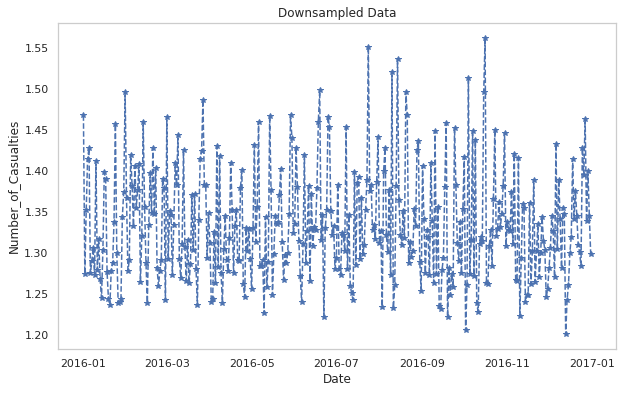

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Number_of_Casualties, '--',marker='*')
#plt.plot(df_daily, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Number_of_Casualties')
plt.title('Downsampled Data')  ## this is just trying out a visualization, more insights from the statistical test

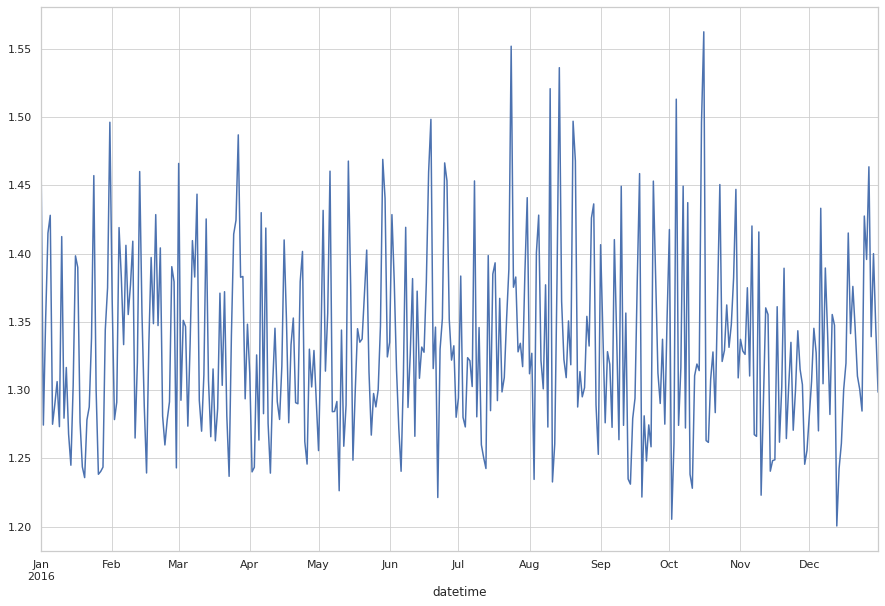

In [14]:
pd.plotting.register_matplotlib_converters()

plt.figure(figsize=(15,10))

df_daily['Number_of_Casualties'].plot()

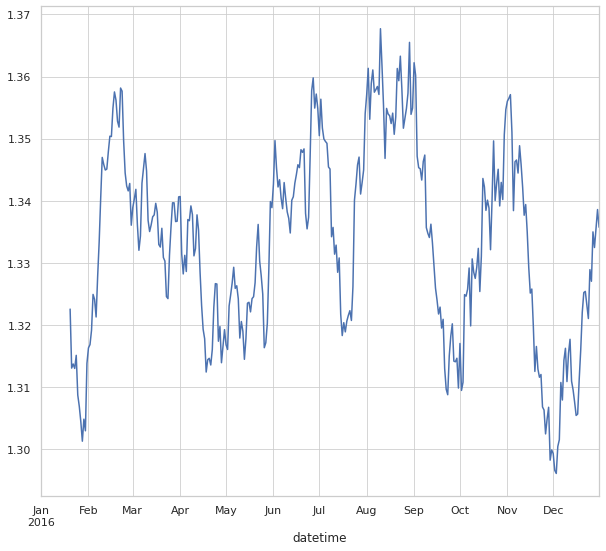

In [15]:
#Carrying out Smoothing
#Using the knowledge of Moving Average We'll take the first 20 days to get better insights of the pattterns

plt.figure(figsize=(10,9))
df_daily_mean = df_daily.rolling(window = 20).mean() # 
df_daily_mean['Number_of_Casualties'].plot()

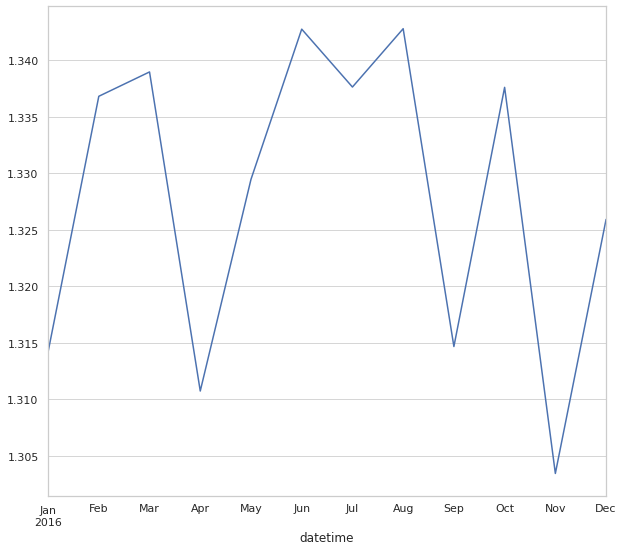

In [16]:
#Desampling to Months to compare

plt.figure(figsize=(10,9))
Time_series_2['Number_of_Casualties'].resample('M').mean().plot()

In [17]:
df_daily['Number_of_Casualties'].describe()

count    366.000000
mean       1.333877
std        0.068245
min        1.200456
25%        1.281252
50%        1.323089
75%        1.379171
max        1.562500
Name: Number_of_Casualties, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



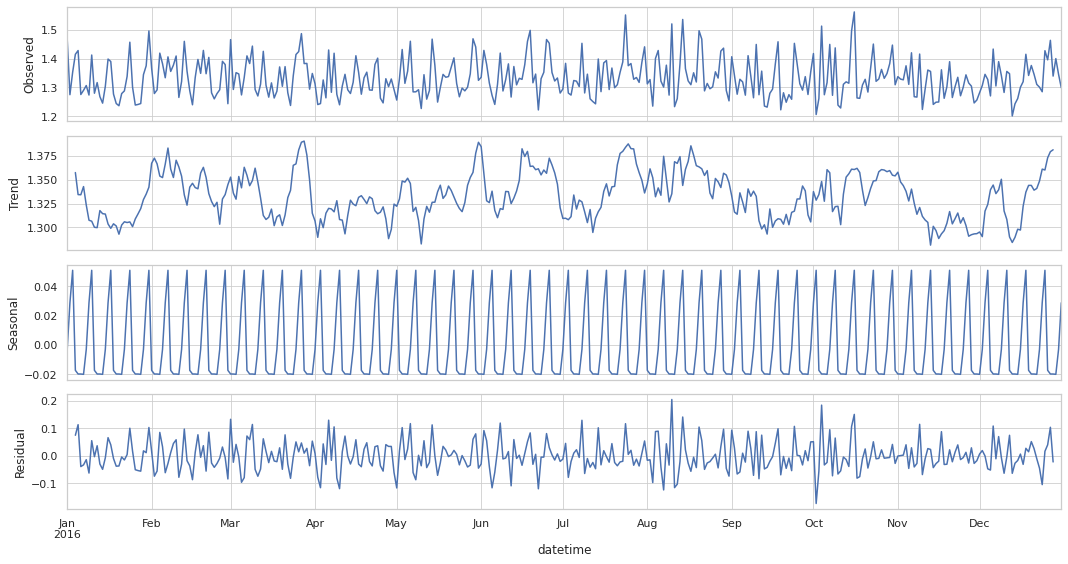

In [18]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_daily['Number_of_Casualties'], model='additive')
decompose_series.plot()
plt.show()

In [19]:
#To confirm its Stationarity

from statsmodels.tsa.stattools import adfuller # using the adfuller test to tes for stationarity

adf_result = adfuller(df_daily['Number_of_Casualties'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -5.618616218726277
p-value: 1.1588635092509938e-06
No. of lags used: 7
No. of observations used : 358
Critical Values:
   1%: -3.448748905151901
   5%: -2.8696473721448728
   10%: -2.5710891239349585


In [20]:
#Training and Forecasting Data

df_daily.tail()

,Number_of_Casualties
datetime,
2016-12-27,1.463602
2016-12-28,1.339161
2016-12-29,1.400000
2016-12-30,1.345382
2016-12-31,1.298507


In [21]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2016-01-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number_of_Casualties  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [22]:
df_daily.shape

(366, 1)

In [23]:
df_daily = df_daily.reset_index() 
df_daily.head()

,datetime,Number_of_Casualties
0,2016-01-01,1.468085
1,2016-01-02,1.274390
2,2016-01-03,1.352459
3,2016-01-04,1.415033
4,2016-01-05,1.428058


In [24]:
df_daily = df_daily.rename(columns={"datetime": "ds", "Number_of_Casualties": "y"})
df_daily.head()

,ds,y
0,2016-01-01,1.468085
1,2016-01-02,1.274390
2,2016-01-03,1.352459
3,2016-01-04,1.415033
4,2016-01-05,1.428058


In [25]:
#For the Training set, we will consider a period that spans from 1st January 2016 to 12th December 2016
#And also for a Test set between the period of 13th December 2017 to 1st May 2017

train = df_daily[(df_daily['ds'] > '2016-01-01') & (df_daily['ds'] <= '2016-12-01')]

test = df_daily[(df_daily['ds'] > '2016-12-01')]

print(train.shape)
print('\n')
print(test.shape)

(335, 2)


(30, 2)


In [26]:
train.head()

,ds,y
1,2016-01-02,1.274390
2,2016-01-03,1.352459
3,2016-01-04,1.415033
4,2016-01-05,1.428058
5,2016-01-06,1.275000


In [27]:
model = Prophet(weekly_seasonality=True, yearly_seasonality=True,seasonality_mode='multiplicative',
                daily_seasonality=True)
model.fit(train)

In [28]:
future_date = model.make_future_dataframe(periods=150, freq='D')
future_date.tail()

,ds
480,2017-04-26
481,2017-04-27
482,2017-04-28
483,2017-04-29
484,2017-04-30


In [29]:
forecast = model.predict(future_date)
forecast[['ds','yhat', 'trend', 'yhat_lower','yhat_upper', 'trend_lower', 'trend_upper']].head()

,ds,yhat,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
0,2016-01-02,1.370961,1.289695,1.296185,1.444172,1.289695,1.289695
1,2016-01-03,1.386262,1.289740,1.305959,1.467354,1.289740,1.289740
2,2016-01-04,1.314066,1.289784,1.231204,1.393144,1.289784,1.289784
3,2016-01-05,1.304694,1.289829,1.235089,1.381232,1.289829,1.289829
4,2016-01-06,1.305930,1.289873,1.227857,1.383216,1.289873,1.289873


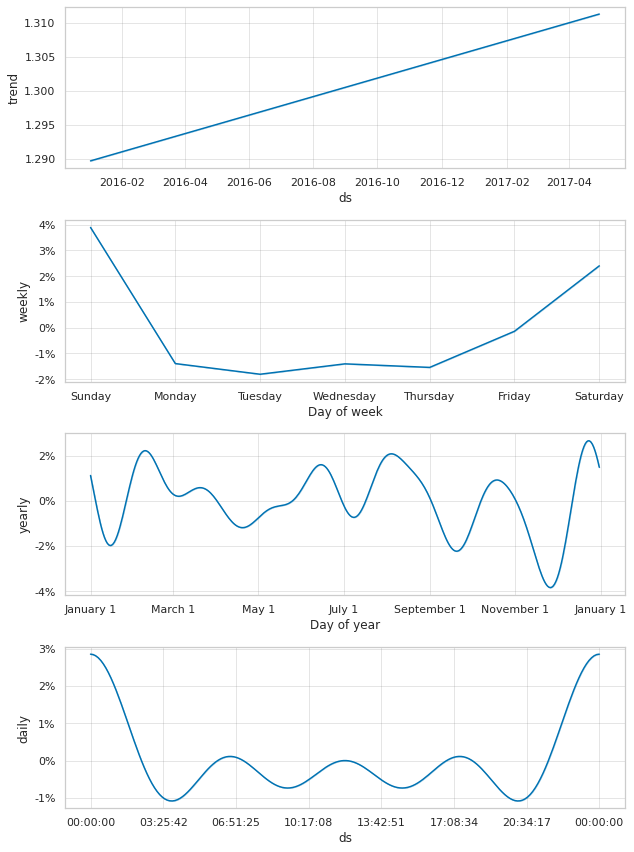

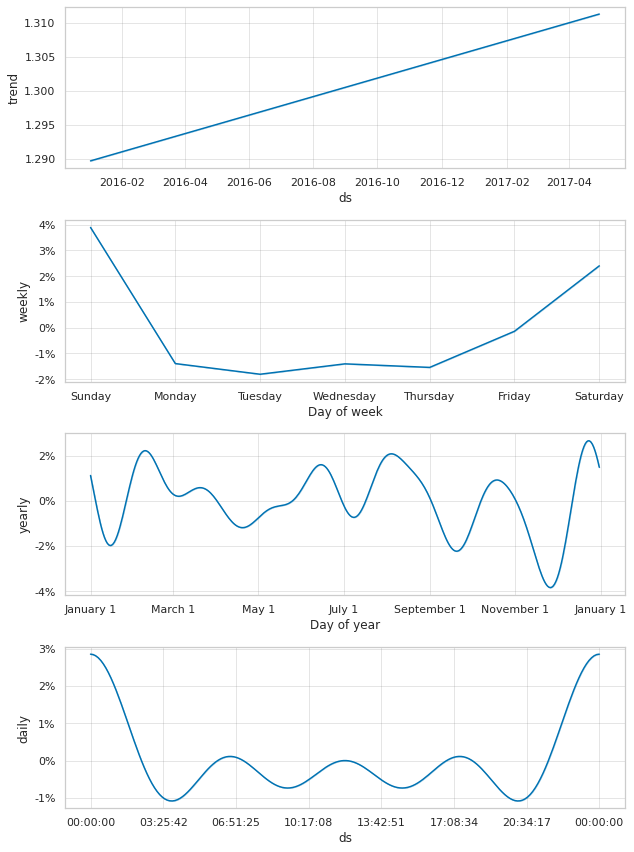

In [30]:
model.plot_components(forecast)

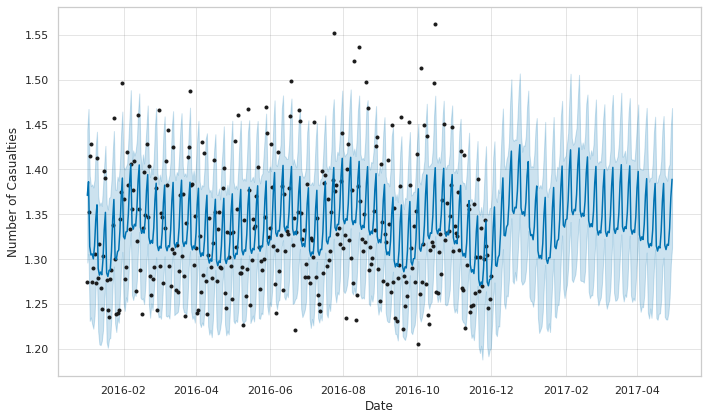

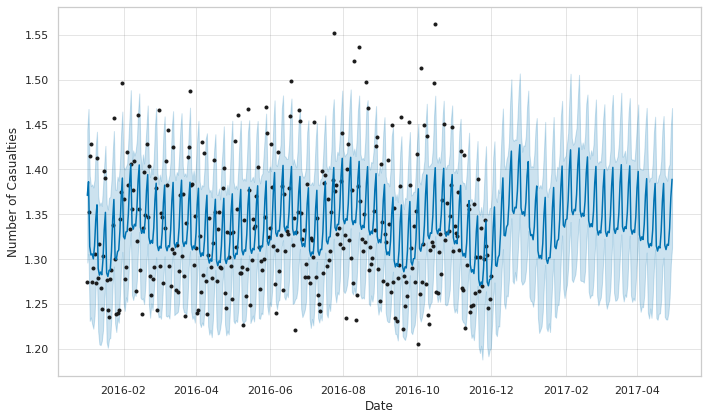

In [31]:
model.plot(forecast, ylabel='Number of Casualties', xlabel='Date', uncertainty=True)

In [35]:
MAE (forecast.trend, forecast.yhat)
  

0.039647266712389766

In [36]:
MSE (forecast.trend, forecast.yhat)

0.0024535286447764653

In [38]:
r2_score (forecast.trend, forecast.yhat)

-62.10133494158585

In [1]:
pip install kfp --upgrade --user

     |████████████████████████████████| 162 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 32.9 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 51 kB 1.1 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for kfp: filename=kfp-1.1.1-py3-none-any.whl size=221431 sha256=8ac1d66c19fa9dbe516d3fdca914f0697c1e1fd68860ad63213c6bc98bb80bc3
  Stored in directory: /home/jupyter/.cache/pip/wheels/41/38/6c/29aaec4c314a72c29ef05a82f3c8d0de06d447145d56d24f61
  Created wheel for kfp-server-api: filename=kfp_server_api-1.0.4-py3-none-any.whl size=104114 sha256=d499248d5606a7db13d07b971f39a98180906d13f21a9495c1a88039b1335c32
  Stored in directory: /home/jupyter/.cache/pip/wheels/1f/46/3e/4c4154156f4278f818e0dc18a82c29f174d2695ec13a396413
  Created wheel for strip-hints: filename=strip_hints-0.1.

In [12]:
!pip install fbprophet

In [24]:
!conda install -c conda-forge fbprophet -y

Solving environment: done

# All requested packages already installed.



In [13]:
# Import Kubeflow SDK
import kfp
import kfp.dsl as dsl
import kfp.components as comp

In [14]:
out_dir = "/home/jovyan/Road_safety/data/out/"

In [15]:
def preprocess (data_path):
  import pickle
  import os
  import sys, subprocess;
  subprocess.run([sys.executable, '-m', 'pip', 'install', 'pandas', 'scikit-learn'])
  import pandas as pd
  import numpy as np
 # import matplotlib.pyplot as plt
  #import seaborn as sns
 # %matplotlib inline
 # import matplotlib as mpl
 # sns.set(style ='whitegrid', rc={'grid.linewidth':0.8})
  #import some metrics and stats
 

  main = pd.read_csv("https://raw.githubusercontent.com/sophiabj/stage-f-01-road-safety/master/data/dftRoadSafety_Accidents_2016.csv")
  pd.set_option("display.max_columns", 32)
  main.fillna(method='ffill',inplace=True)
  main.to_csv('Time_series', index=False)
  Time_series = pd.read_csv('Time_series', infer_datetime_format=True, parse_dates={'datetime':[9,11]},
                 index_col=['datetime'], header = 0,)
  Time_series_2 = Time_series[['Accident_Index','Number_of_Casualties']]
  Time_series_2.isna().sum()
  Time_series_2.index = pd.to_datetime(Time_series.index)
  df_daily = Time_series_2.resample('D').mean()
    
    
  df_daily = df_daily.reset_index()

  df_daily = df_daily.rename(columns={"datetime": "ds", "Number_of_Casualties": 'y'})
    
  train = df_daily[(df_daily["ds"] > '2016-01-01') & (df_daily["ds"] <= '2016-12-01')]

  test = df_daily[(df_daily["ds"] > '2016-12-01')]

  #Output file to path
  np.savez_compressed(f'{data_path}/preprocessed-data.npz',
                      train = train,
                      test = test)
  print("Preprocessing Done")



Training the Model

In [16]:
def train(data_path, model_file):
  import pickle
  import sys 
  import os
  import subprocess
  subprocess.run([sys.executable, '-m', 'pip', 'install', 'pandas', 'scikit-learn'])
  import pandas as pd
 
  from fbprophet import Prophet

  preprocessed_data = np.load(f'{data_path}/preprocessed-data.npz')

  train = preprocessed_data['train']
  

  model = Prophet(weekly_seasonality=True, yearly_seasonality=True,seasonality_mode='multiplicative',
                daily_seasonality=True)
  model.fit(train)

  #Save the model
  with open(f'{data_path}/{model_file}', 'wb') as file:
    pickle.dump(model_file)

  print("Model Trained")
  
  


In [17]:
def predict (data_path, model_file):
  import pickle
  import sys, subprocess;
  subprocess.run([sys.executable, '-m', 'pip', 'install', 'pandas', 'scikit-learn'])
  from sklearn.metrics import mean_absolute_error as MAE
  from sklearn.metrics import mean_squared_error as MSE
  from sklearn.metrics import r2_score


  #Load saved model
  with open(f'{data_path}/model_file','rb') as file:
    model = pickle.load(file)

  

  #Evaluate model and print results
  future_date = model.make_future_dataframe(periods=150, freq='D')

  forecast = model.predict(future_date)
  #forecast[['ds','yhat', 'trend', 'yhat_lower','yhat_upper', 'trend_lower', 'trend_upper']].head()

  print('Model \nr2_score = {} \nMAE = {} \nMSE = {}' .format(r2_score(forecast.trend, forecast.yhat),
        MAE (forecast.trend, forecast.yhat), MSE (forecast.trend, forecast.yhat) ))
  
  #save result
  with open(f'{data_path}/model_result.txt', 'w') as result:
    result.write("Prediction:{},\nActual: {}".format(forecast, test))
  
  print("Prediction saved!")


In [18]:
preprocess_op = comp.func_to_container_op(preprocess , base_image = "tensorflow/tensorflow:latest-gpu-py3")
train_op = comp.func_to_container_op(train , base_image = "tensorflow/tensorflow:latest-gpu-py3")
predict_op = comp.func_to_container_op(predict , base_image = "tensorflow/tensorflow:latest-gpu-py3")

In [19]:
import kfp
client = kfp.Client(host='51d2cc85769d1448-dot-us-central2.pipelines.googleusercontent.com')



In [20]:
# Define the pipeline
@dsl.pipeline(
   name='Road Safety Pipeline',
   description='An ML pipeline that predicts safest and dangerous times to travel.'
)

# Define parameters to be fed into pipeline
def road_safety_container_pipeline(
    data_path: str,
    model_file: str
):
    
    # Define volume to share data between components.
    vop = dsl.VolumeOp(
    name="create_volume",
    resource_name="data-volume", 
    size="1Gi", 
    modes=dsl.VOLUME_MODE_RWO)
    
    # Create presidential elections training component.
    road_safety_preprocess_container = preprocess_op(data_path).add_pvolumes({data_path: vop.volume})
    
    road_safety_training_container = train_op(data_path, model_file) \
                                    .add_pvolumes({data_path: road_safety_preprocess_container.pvolume})

    # Create presidential elections prediction component.
    road_safety_predict_container = predict_op(data_path, model_file) \
                                    .add_pvolumes({data_path: road_safety_training_container.pvolume})
    
    # Print the result of the prediction
    road_safety_result_container = dsl.ContainerOp(
        name="print_prediction",
        image='library/bash:4.4.23',
        pvolumes={data_path: road_safety_predict_container.pvolume},
        arguments=['head', f'{data_path}/model_result.txt']
    )

In [21]:
DATA_PATH = '/mnt'
MODEL_PATH='road_safety_model.h5'

In [22]:
pipeline_func = road_safety_container_pipeline

In [23]:
experiment_name = 'road_safety_kubeflow'
run_name = pipeline_func.__name__ + ' run'

arguments = {"data_path":DATA_PATH,
             "model_file":MODEL_PATH}

# Compile pipeline to generate compressed YAML definition of the pipeline.
kfp.compiler.Compiler().compile(pipeline_func,  
  '{}.zip'.format(experiment_name))

# Submit pipeline directly from pipeline function
run_result = client.create_run_from_pipeline_func(pipeline_func, 
                                                  experiment_name=experiment_name, 
                                                  run_name=run_name, 
                                                  arguments=arguments)

/home/jupyter/.local/lib/python3.7/site-packages/kfp/dsl/_container_op.py:1028: FutureWarning: Please create reusable components instead of constructing ContainerOp instances directly. Reusable components are shareable, portable and have compatibility and support guarantees. Please see the documentation: https://www.kubeflow.org/docs/pipelines/sdk/component-development/#writing-your-component-definition-file The components can be created manually (or, in case of python, using kfp.components.create_component_from_func or func_to_container_op) and then loaded using kfp.components.load_component_from_file, load_component_from_uri or load_component_from_text: https://kubeflow-pipelines.readthedocs.io/en/latest/source/kfp.components.html#kfp.components.load_component_from_file
  category=FutureWarning,
